In [17]:
from __future__ import division, print_function
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from matplotlib.pylab import plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.spatial.distance import cdist
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn
import pylab
pylab.rcParams['image.cmap'] = 'RdYlGn'

## Question 1.  (33 pts)

Let's explore clustering models on an artificial data set with five features.

In [2]:
data1 = pd.read_csv('hw4data1.csv')
data1.head()

,1,2,3,4,5
0,0.624358,-0.007694,0.157510,0.440554,0.157423
1,-0.065098,-0.000790,0.271934,0.224854,0.158883
2,-0.086525,-0.280988,-0.025699,0.263920,0.421017
3,-0.581743,-0.275640,-0.290320,-0.213967,0.497857
4,0.170606,1.020045,-0.583633,0.887644,0.105641


#### a) First, visualize the data after applying PCA in two dimensions. Based on the plot (with axes corresponding to the two leading PCs), guess the number of clusters we could have. (5 pts)

total variance:31.4221709004
variance explained via the first and second components:26.4100475199, 5.09112141483

Transformation matrix:
[[-0.59096891 -0.61780358 -0.3031117  -0.2994631  -0.29583717]
 [ 0.71205013 -0.70166526  0.01295789  0.00988721  0.01961646]]


[]

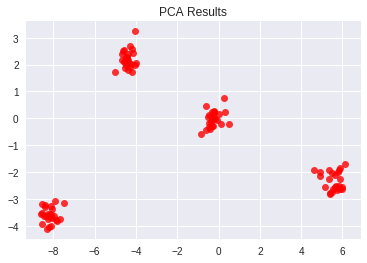

In [18]:
print("total variance:{}".format(np.sum(np.var(data1,0))))
pca = PCA(2) 
pca.fit(data1)
print("variance explained via the first and second components:{}, {}\n".format(pca.explained_variance_[0],pca.explained_variance_[1]))
print("Transformation matrix:\n{}".format(pca.components_))
plt.title('PCA Results')
P = np.dot(data1,pca.components_.T)
plt.plot(P[:, 0], P[:, 1], 'or', alpha=0.8)
plt.plot()

**Prediction:** It appears, based on this plot, that we will have 4 clusters.

#### b) Use K-means to cluster the original data based on your guess for the number of clusters. Report the resulting labels. (3 pts)

In [19]:
kmeans = KMeans(4).fit(P)
kmeans.labels_

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

#### c) Visualize the clustering result: reuse the plot from part a) and color the points according to the labels obtained in part b). (5 pts)

[]

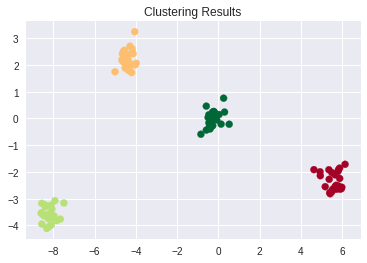

In [20]:
plt.scatter(P[:,0], P[:,1], c=kmeans.labels_)
plt.title('Clustering Results')
plt.plot()

#### d) Justify your guess for k (the optimal number of clusters for K-means clustering) by first using silhouette_score and then the Elbow method on the original data. Briefly explain your approach. Are your results consistent? (12 pts)

[]

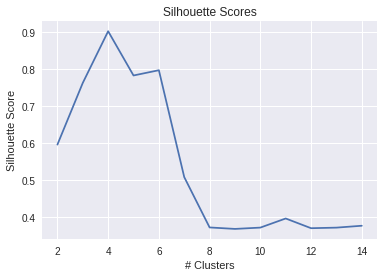

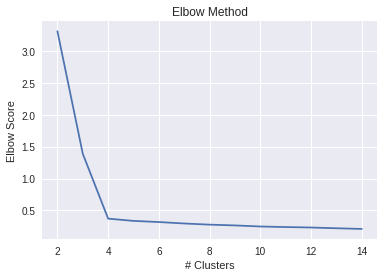

In [21]:
silhouette_scores = []
elbow__scores = []
numClusters = range(2, 15)

for i in numClusters:
    silhouette_scores.append(silhouette_score(P, KMeans(i).fit(P).labels_))

fig1 = plt.figure()
plt.plot(numClusters, silhouette_scores)
plt.xlabel('# Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores')
plt.plot()

for i in numClusters:
    elbow__scores.append(cdist(P, KMeans(i).fit(P).cluster_centers_, 'euclidean').min(axis=1).sum() / P.shape[0])

fig2 = plt.figure()
plt.plot(numClusters, elbow__scores)
plt.xlabel('# Clusters')
plt.ylabel('Elbow Score')
plt.title('Elbow Method')
plt.plot()

**Discussion:** Confirming the assumptions we made through our visual display of the data, both Silhouette Scores and Elbow Method are consistint on justifying our use of 4 clusters. The Silhouette Score is highest for 4, and the Elbow Method's 'elbow' occurs sharply at 4 - while it still continues downwards, this is generally a good indicator that 4 is the ideal number. Given this triple confirmation (visual, silhouette, and elbow), we can be fairly confident in our asumption of 4 distinct clusters for this data.

#### e) Using a Gaussian Mixture model instead of K-means (but with the same value for k), repeat parts b) and c). (8 pts)

[]

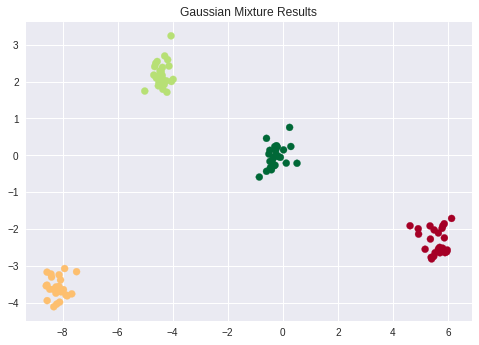

In [7]:
gauss_mix = GaussianMixture(4)
gauss_mix.fit(P)
y = gauss_mix.predict(P)
plt.scatter(P[:,0], P[:,1], c=y)
plt.title('Gaussian Mixture Results')
plt.plot()

**Discussion:** The Gaussian Mixture results very much align with those found using our previous methods, further solidifying our assumptions.

## Question 2. (14 pts)

The following data comes from a larger set detailing every motor vehicle collision in NYC (available [here](https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions/h9gi-nx95)). This particular subset only considers collisions that occurred on October 31, 2017.

You have 680 collision records in the file ‘NYPD_Motor_Vehicle_Collisions_Duplicates.csv’, but you realize that some of these are actually duplicates resulting from a technical error. You know that there are approximately 620 unique records in the file, but you want to determine the exact number.

#### a) Implement a clustering technique of your choice that will determine the exact number of unique records. (Hint: assigning each unique record to its own cluster would result in perfect clustering. Cluster the data\* based on possible values for the number of unique records and observe the results.) Briefly explain your approach. (10 pts)
\* You may first have to factorize the data set, as it contains string variables.

In [8]:
data2 = pd.read_csv('NYPD_Motor_Vehicle_Collisions_Duplicates.csv').fillna('')
data2.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,10/31/2017,0:00,,,40.7331,-73.9548,"(40.733135, -73.954765)",MANHATTAN AVENUE,,,...,Unspecified,,,,3781862,PICK-UP TRUCK,PICK-UP TRUCK,,,
1,10/31/2017,0:00,,,40.7535,-73.8979,"(40.75351, -73.8979)",,,,...,Unspecified,,,,3781130,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,,,
2,10/31/2017,0:00,MANHATTAN,10036,40.7597,-73.9917,"(40.759727, -73.99169)",WEST 44 STREET,9 AVENUE,,...,,,,,3781009,PASSENGER VEHICLE,,,,
3,10/31/2017,0:00,BROOKLYN,11207,,,,LINDEN BOULEVARD,WILLIAMS AVENUE,,...,Unspecified,,,,3780501,PASSENGER VEHICLE,DS,,,
4,10/31/2017,0:00,MANHATTAN,10030,40.8156,-73.9435,"(40.81561, -73.943474)",,,2309 7 AVENUE,...,Unspecified,Unspecified,,,3780511,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,PASSENGER VEHICLE,,


In [9]:
for i in data2.columns:
    data2[i] = pd.factorize(data2[i])[0]
data2.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,1,1,0,0,...,0,0,0,0,1,1,1,0,0,0
2,0,0,1,1,2,2,2,2,1,0,...,1,0,0,0,2,2,2,0,0,0
3,0,0,2,2,3,3,3,3,2,0,...,0,0,0,0,3,2,3,0,0,0
4,0,0,1,3,4,4,4,1,0,1,...,0,1,0,0,4,1,1,1,0,0


In [10]:
X=data2
range_n_clusters = range(615, 625)
for n_clusters in range_n_clusters:
    km = KMeans(n_clusters=n_clusters, random_state=324)
    cluster_labels = km.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))
    

For n_clusters =615, the average silhouette_score is :0.19068380951
For n_clusters =616, the average silhouette_score is :0.188082628898
For n_clusters =617, the average silhouette_score is :0.185294117647
For n_clusters =618, the average silhouette_score is :0.185294117647
For n_clusters =619, the average silhouette_score is :0.185294117647
For n_clusters =620, the average silhouette_score is :0.185294117647
For n_clusters =621, the average silhouette_score is :0.185294117647
For n_clusters =622, the average silhouette_score is :0.185294117647
For n_clusters =623, the average silhouette_score is :0.185294117647
For n_clusters =624, the average silhouette_score is :0.185294117647


**Explaination:** After initially factorizing the data to account for string variables, I ran a series of silhoette scores around the given 620 value provided. A clear answer emerged, as the scores remained constant above 617, which is the number I will posit for unique values in this dataframe.

#### b) Confirm the number of unique records by using a more straightforward technique to identify duplicate rows. Pandas has a convenient function to drop duplicates for this purpose.  How well did your clustering technique perform?  (4 pts)

In [11]:
len(data2.drop_duplicates())

617

**Explaination:** This result seems to confirm our clustering analysis.

## Question 3. (8 pts)

Which of the following is always true for the confusion matrix resulting from a binary classification task? (Select all that apply.)
* **a) it is a square matrix** TRUE
* b) it is symmetrical
* c) it has dimensions $3\times3$
* **d) it reports the size of each class in the test set** TRUE
* e) it reports the total size of the training set
* **f) it reports the number of observations the classifier assigned to each class** TRUE
* **g) it reports the proportion of correct predictions across the test set** TRUE

## Question 4. (25 pts)

For the following logistic regression task, use the first half of the data in 'hw4data4.csv' as the training set, and the second half as the test set.

In [22]:
data4 = pd.read_csv('hw4data4.csv')
data4.head()

,x1,x2,x3,y
0,-1.057594,-0.143935,-1.245903,1
1,-0.642280,1.382141,0.071458,0
2,0.842085,2.400458,-0.110854,0
3,-0.003466,0.725551,-0.007954,0
4,-0.607444,1.146293,-1.338008,0


In [23]:
y = data4['y'].values
X = data4[['x1', 'x2', 'x3']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=123)

#### a) Construct a logistic regression object for modeling, setting C = 10,000 to disable regularization. (2 pts)

In [15]:
logit = LogisticRegression(C=1e4)

#### b) Fit your logistic regression model to the training data. Print out the fitted parameters (including the intercept). (5 pts)

In [26]:
logit = logit.fit(X_train, y_train)
print("Logistic Model Fit to Training Data:")
print("Coefficients:", logit.coef_[0],"\nIntercept:", logit.intercept_[0])

Logistic Model Fit to Training Data:
Coefficients: [-21.95576299 -54.45255037 -21.79416966] 
Intercept: -2.17385937072


#### c) Use your trained model to predict labels for the test data. (3 pts)

In [27]:
y_pred = logit.predict(X_test)
results = []
for i in range(0, len(y_test)):
    results.append((y_test[i], y_pred[i]))
print(results)

[(0, 0), (0, 0), (1, 1), (1, 1), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 1), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (1, 1), (0, 0), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (0, 0), (1, 1), (1, 1), (0, 0), (0, 0), (1, 1), (1, 1), (1, 1), (0, 0), (1, 1), (0, 0), (1, 1), (0, 0)]


#### d) Draw two plots: one displaying your predicted labels and another with the actual labels. Include the decision boundary in both. (10 pts)

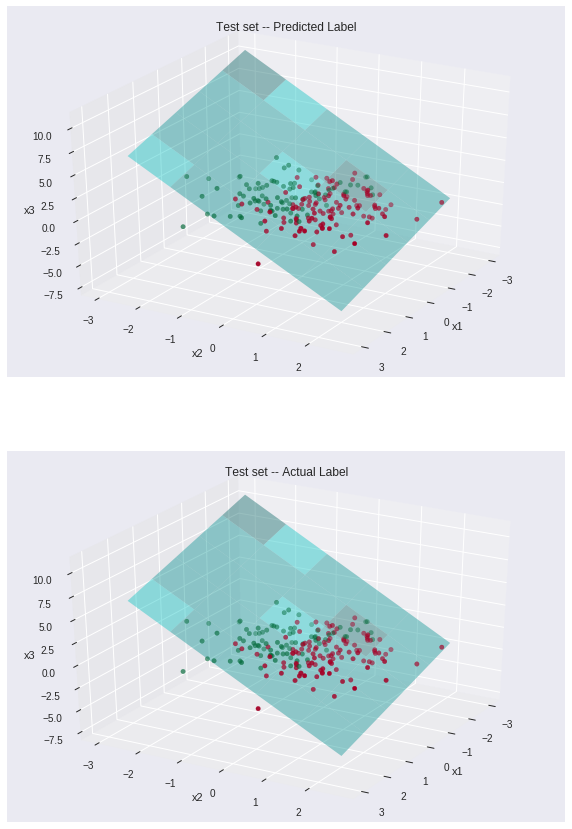

In [61]:
from mpl_toolkits.mplot3d import Axes3D

fig3 = plt.figure(figsize = (10,15))
ax2, ax3 = fig3.add_subplot(211,projection='3d'), fig3.add_subplot(212,projection='3d')
# Generate coordinates for hyperplane
radius = 3
x1, x2 = np.meshgrid(range(-radius,radius), range(-radius,radius))
fit_y = -(logit.intercept_[0] + logit.coef_[0][0]*x1 + logit.coef_[0][1]*x2)/logit.coef_[0][2]

ax2.plot_surface(x1, x2, fit_y, color='c', alpha = 0.4)
ax3.plot_surface(x1, x2, fit_y, color='c', alpha = 0.4)

ax2.set(title='Test set -- Predicted Label', xlabel = 'x1', ylabel = 'x2', zlabel = 'x3')
ax3.set(title='Test set -- Actual Label', xlabel = 'x1', ylabel = 'x2', zlabel = 'x3')

ax2.scatter(data4.x1, data4.x2, data4.x3, c = data4.y)
ax3.scatter(data4.x1, data4.x2, data4.x3, c = data4.y)
ax2.view_init(azim=30)
ax3.view_init(azim=30)
plt.show()

#### e) Compute the confusion matrix. Print out accuracy, recall and precision. (5 pts)

In [ ]:
confusion_matrix = confusion_matrix(y_test, y_pred)

In [29]:
print('Confusion Matrix:\n', confusion_matrix[0],'\n',
      confusion_matrix[1])
print('Accuracy:', (confusion_matrix[0][0] + confusion_matrix[1][1]) / confusion_matrix.sum())
print('Precision:', (confusion_matrix[0][0]) / (confusion_matrix[0][0] + confusion_matrix[0][1]))
print('Recall:', (confusion_matrix[0][0]) / (confusion_matrix[0][0] + confusion_matrix[1][0]))

Confusion Matrix:
 [56  2] 
 [ 0 42]
Accuracy: 0.98
Precision: 0.965517241379
Recall: 1.0


## Question 5. (20 pts)

Let's revisit the Iris data set, which consists of three different classes of irises (labeled 0, 1, and 2).
<br>We'll use all four features (sepal length, sepal width, petal length and petal width) to train a logistic regression multi-class classifier.

#### a) Load Iris data from sklearn.datasets and set up X and y accordingly (retain all the features for X). (2 pts)

In [30]:
from sklearn import datasets
iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target

#### b) Fit a logistic regression model to the entire data set (no need to split into training and test sets). (5 pts)

In [31]:
len(y_iris)

150

In [32]:
logit2 = LogisticRegression(C=1e6)
logit2.fit(X_iris, y_iris)

LogisticRegression(C=1000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

#### c) Use the model to predict class labels for the same data on which it was trained. (2 pts)

In [33]:
y_pred_iris = logit2.predict(X_iris)
results = []
for i in range(0, len(y_iris)):
    results.append((y_iris[i], y_pred_iris[i]))
print(results)

[(0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (0, 0), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 2), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 2), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (1, 1), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2), (2, 2),

#### d) Calculate and print out the multi-class (3$\times$3) confusion matrix. (5 pts)

In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix_iris = confusion_matrix(y_iris, y_pred_iris)

In [41]:
print('Iris Confusion Matrix:')
print(confusion_matrix_iris[0])
print(confusion_matrix_iris[1])
print(confusion_matrix_iris[2])

Iris Confusion Matrix:
[50  0  0]
[ 0 48  2]
[ 0  1 49]


#### e) Based on the confusion matrix you've obtained, calculate: (2 pts)
    i) the precision with respect to the class labeled 0
    ii) the model's overall accuracy

In [44]:
precision = confusion_matrix_iris[0][0] / (confusion_matrix_iris[0][0] + confusion_matrix_iris[0][1] + confusion_matrix_iris[0][2])
print('precision = ', precision)
accuracy = (confusion_matrix_iris[0][0] + confusion_matrix_iris[1][1] + confusion_matrix_iris[2][2]) / confusion_matrix_iris.sum()
print('accuracy =',accuracy)

precision =  1.0
accuracy = 0.98


i) Precision for Class '0' = 50 / (50 + 0 + 0) = 100%<br>
ii) Overall Accuracy = tr(confusion_matrix) / confusion_matrix.sum() = 147/150 = 98%

#### f) Create a scatter plot of the data after applying PCA in two dimensions. Use the labels obtained in part c) to visualize the classification.  (4 pts)

[]

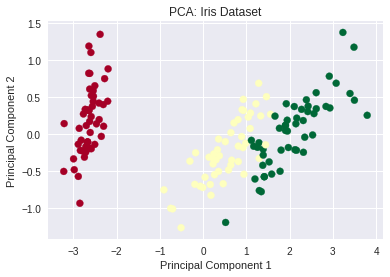

In [35]:
pca = PCA(2)
P = pca.fit_transform(X_iris)
plt.scatter(P[:,0], P[:,1], c=y_pred_iris)
plt.title('PCA: Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.plot()